In [1]:
!git --version

git version 2.34.1


In [2]:
!git clone https://github.com/dinhtanloc/ads_fraud_detection.git

Cloning into 'ads_fraud_detection'...
remote: Enumerating objects: 6535, done.
remote: Counting objects: 100% (284/284), done.
remote: Compressing objects: 100% (235/235), done.
remote: Total 6535 (delta 196), reused 69 (delta 48), pack-reused 6251 (from 2)
Receiving objects: 100% (6535/6535), 386.13 MiB | 36.62 MiB/s, done.
Resolving deltas: 100% (3770/3770), done.
Updating files: 100% (1884/1884), done.


In [3]:
pip install joblib cufflinks pydantic-settings mlxtend keras-tuner wandb shap lime tabnet-keras imbalanced-learn scikit-learn-extra xgboost lightgbm faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 54.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 85.2 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [4]:
from kaggle_secrets import UserSecretsClient
import os
user_secrets = UserSecretsClient()
KAGGLE_KEY = user_secrets.get_secret("KAGGLE_KEY")
KAGGLE_USERNAME = user_secrets.get_secret("KAGGLE_USERNAME")
os.environ['KAGGLE_USERNAME'] = KAGGLE_USERNAME
os.environ['KAGGLE_KEY'] = KAGGLE_KEY

from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

print("Kaggle API authenticated successfully!")

Kaggle API authenticated successfully!


In [5]:
%run /kaggle/working/ads_fraud_detection/src/prj3/1.EDA/EDA_mainbaseline_kaggle.ipynb

/kaggle/working/ads_fraud_detection
/kaggle/working/ads_fraud_detection
2.17.1
env: JOBLIB_TEMP_FOLDER=/tmp
Data download location /kaggle/working/tmp
ieeecis
Train set: 


EVENT_LABEL  transactionamt productcd    card1  card2  card3  \
TransactionID                                                                 
2987000.0                0            68.5         W  13926.0    NaN  150.0   
2987001.0                0            29.0         W   2755.0  404.0  150.0   
2987002.0                0            59.0         W   4663.0  490.0  150.0   
2987003.0                0            50.0         W  18132.0  567.0  150.0   
2987004.0                0            50.0         H   4497.0  514.0  150.0   

               card5   card6  addr1  dist1  ...  id_17  id_19  id_20  \
TransactionID                               ...                        
2987000.0      142.0  credit  315.0   19.0  ...    NaN    NaN    NaN   
2987001.0      102.0  credit  325.0    NaN  ...    NaN    NaN    NaN   
2987002.0      166.0   debit  330.0  287.0  ...    NaN    NaN    NaN   
2987003.0      117.0   debit  476.0    NaN  ...    NaN    NaN    NaN   
2987004.0      102.0  credit  420.0    NaN  ...  166.0  542.0  144.0   

               devicetype                     deviceinfo  \
TransactionID                                              
2987000.0             NaN                            NaN   
2987001.0             NaN                            NaN   
2987002.0             NaN                            NaN   
2987003.0             NaN                            NaN   
2987004.0          mobile  SAMSUNG SM-G892A Build/NRD90M   

                                           EVENT_ID             ENTITY_ID  \
TransactionID                                                               
2987000.0      e5d4cce5-7884-4306-8c31-43952843ffc3   13926.0_315.0_-13.0   
2987001.0      2d9a23b9-4270-43b1-97b5-8128867814db      2755.0_325.0_1.0   
2987002.0      f1d5f36e-32c6-485c-a8e6-35f6a9ff4070      4663.0_330.0_1.0   
2987003.0      61eb55cb-52c1-4928-b2fa-18b6fb74b90c  18132.0_476.0_-111.0   
2987004.0      fd4a3283-7663-47dd-b428-c9b05fddbcc1      4497.0_420.0_1.0   

                    EVENT_TIMESTAMP       LABEL_TIMESTAMP  ENTITY_TYPE  
TransactionID                                                           
2987000.0      2021-01-02T00:00:00Z  2025-04-30T19:27:52Z         user  
2987001.0      2021-01-02T00:00:01Z  2025-04-30T19:27:52Z         user  
2987002.0      2021-01-02T00:01:09Z  2025-04-30T19:27:52Z         user  
2987003.0      2021-01-02T00:01:39Z  2025-04-30T19:27:52Z         user  
2987004.0      2021-01-02T00:01:46Z  2025-04-30T19:27:52Z         user  

[5 rows x 73 columns]

73
(561013, 73)
Test set: 


transactionamt productcd    card1  card2  card3  card5  \
TransactionID                                                                
3548013.0      125.000000000000000         S  15775.0  481.0  150.0  102.0   
3548014.0      125.000000000000000         S  15775.0  481.0  150.0  102.0   
3548015.0      125.000000000000000         S  15775.0  481.0  150.0  102.0   
3548016.0      125.000000000000000         S  15775.0  481.0  150.0  102.0   
3548017.0       31.950000762939453         W   9500.0  321.0  150.0  226.0   

                card6  addr1  dist1 p_emaildomain  ... id_13  id_17  id_19  \
TransactionID                                      ...                       
3548013.0      credit  330.0    NaN           NaN  ...  52.0  166.0  633.0   
3548014.0      credit  330.0    NaN           NaN  ...  52.0  166.0  633.0   
3548015.0      credit  330.0    NaN           NaN  ...  52.0  166.0  633.0   
3548016.0      credit  330.0    NaN           NaN  ...  52.0  166.0  633.0   
3548017.0       debit  204.0   74.0           NaN  ...   NaN    NaN    NaN   

               id_20  devicetype  deviceinfo  \
TransactionID                                  
3548013.0      533.0     desktop     Windows   
3548014.0      533.0     desktop     Windows   
3548015.0      533.0     desktop     Windows   
3548016.0      533.0     desktop     Windows   
3548017.0        NaN         NaN         NaN   

                                           EVENT_ID            ENTITY_ID  \
TransactionID                                                              
3548013.0      ea23c4eb-f14e-4da1-9d86-51b93268fc1b  15775.0_330.0_129.0   
3548014.0      526f0501-15f0-4516-873e-0d18781f0ea8  15775.0_330.0_129.0   
3548015.0      3ed7877b-a17e-4791-bddc-978d77d55e3f  15775.0_330.0_129.0   
3548016.0      88c119a5-6d7b-4fe9-954e-e91883210cfd  15775.0_330.0_129.0   
3548017.0      26c5bc8b-40a3-4aab-8234-6cee916a5ca6   9500.0_204.0_150.0   

                    EVENT_TIMESTAMP  ENTITY_TYPE  
TransactionID                                     
3548013.0      2021-06-21T23:11:15Z         user  
3548014.0      2021-06-21T23:11:29Z         user  
3548015.0      2021-06-21T23:11:45Z         user  
3548016.0      2021-06-21T23:12:00Z         user  
3548017.0      2021-06-21T23:12:11Z         user  

[5 rows x 71 columns]

(29527, 71)
Test scores


EVENT_LABEL                              EVENT_ID
TransactionID                                                   
3548013.0                0  ea23c4eb-f14e-4da1-9d86-51b93268fc1b
3548014.0                0  526f0501-15f0-4516-873e-0d18781f0ea8
3548015.0                0  3ed7877b-a17e-4791-bddc-978d77d55e3f
3548016.0                0  88c119a5-6d7b-4fe9-954e-e91883210cfd
3548017.0                0  26c5bc8b-40a3-4aab-8234-6cee916a5ca6

EVENT_LABEL
0    28358
1     1169
Name: count, dtype: int64
EVENT_LABEL
0    0.965252142107224
1    0.034747857892776
Name: proportion, dtype: float64
(561013, 72) (29527, 73)
Không có cột nào bị thiếu trong test.
Không có cột nào bị thiếu trong train.
Train dataset has 561013 rows and 72 columns.
Test dataset has 29527 rows and 73 columns.
There are 51 columns in train dataset with missing values.


In [6]:
%run /kaggle/working/ads_fraud_detection/src/prj3/2.preprocessing/1.base/pre-processing-mainbaseline_noSMOTE_kaggle.ipynb

/kaggle/working/ads_fraud_detection
['isFraud', 'ENTITY_TYPE', 'c7', 'card3', 'R_emaildomain_3', 'P_emaildomain_3']
Column id_12 not found in train/test data. Skipping Label Encoding for this column.
Column id_14 not found in train/test data. Skipping Label Encoding for this column.
Column id_15 not found in train/test data. Skipping Label Encoding for this column.
Column id_16 not found in train/test data. Skipping Label Encoding for this column.
Column id_18 not found in train/test data. Skipping Label Encoding for this column.
Column id_21 not found in train/test data. Skipping Label Encoding for this column.
Column id_22 not found in train/test data. Skipping Label Encoding for this column.
Column id_23 not found in train/test data. Skipping Label Encoding for this column.
Column id_24 not found in train/test data. Skipping Label Encoding for this column.
Column id_25 not found in train/test data. Skipping Label Encoding for this column.
Column id_26 not found in train/test data. S

In [7]:
import tensorflow as tf

# Kiểm tra phiên bản TensorFlow
print("TensorFlow version:", tf.__version__)

# Kiểm tra xem TensorFlow có phát hiện GPU hay không
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"Số lượng GPU được phát hiện: {len(gpus)}")
    for gpu in gpus:
        print(f"  - {gpu}")
else:
    print("Không có GPU nào được phát hiện. TensorFlow đang sử dụng CPU.")

# # Kiểm tra xem GPU có được sử dụng trong quá trình tính toán hay không
# with tf.device('/GPU:0'):  # Thử sử dụng GPU
#     a = tf.constant([[1.0, 2.0], [3.0, 4.0]])
#     b

TensorFlow version: 2.17.1
Số lượng GPU được phát hiện: 1
  - PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


/kaggle/working/ads_fraud_detection
Using GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
(29488, 2) (561003, 2)
(29488, 2)
89


Model: "inception_resnet_v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 89, 1)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 44, 16)         │             64 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 44, 16)         │            132 │ conv1d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 44, 16)         │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 42, 16)         │            784 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 42, 16)         │            126 │ conv1d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 42, 16)         │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 42, 32)         │          1,568 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 42, 32)         │            126 │ conv1d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 42, 32)         │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 20, 32)         │              0 │ activation_2[0][0]     │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 20, 80)         │          2,640 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 20, 80)         │             60 │ conv1d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 20, 80)         │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 18, 192)        │         46,272 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 18, 192)        │             54 │ conv1d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 24,310,888 (92.74 MB)

 Trainable params: 24,308,228 (92.73 MB)

 Non-trainable params: 2,660 (10.39 KB)

Model: "inception_resnet_v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 89, 1)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 44, 16)         │             64 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 44, 16)         │            132 │ conv1d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 44, 16)         │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 42, 16)         │            784 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 42, 16)         │            126 │ conv1d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 42, 16)         │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 42, 32)         │          1,568 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 42, 32)         │            126 │ conv1d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 42, 32)         │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 20, 32)         │              0 │ activation_2[0][0]     │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 20, 80)         │          2,640 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 20, 80)         │             60 │ conv1d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 20, 80)         │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 18, 192)        │         46,272 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 18, 192)        │             54 │ conv1d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 24,310,888 (92.74 MB)

 Trainable params: 24,308,228 (92.73 MB)

 Non-trainable params: 2,660 (10.39 KB)

Epoch 1/1200
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 578s 179ms/step - accuracy: 0.7285 - f1_score: 0.4860 - loss: 0.5949 - val_accuracy: 0.9163 - val_f1_score: 0.6231 - val_loss: 0.3100 - learning_rate: 1.0000e-04
Epoch 2/1200
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 306s 139ms/step - accuracy: 0.8113 - f1_score: 0.5536 - loss: 0.4813 - val_accuracy: 0.9382 - val_f1_score: 0.6405 - val_loss: 0.2758 - learning_rate: 1.0000e-04
Epoch 3/1200
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 303s 138ms/step - accuracy: 0.8254 - f1_score: 0.5646 - loss: 0.4528 - val_accuracy: 0.9118 - val_f1_score: 0.6324 - val_loss: 0.3292 - learning_rate: 1.0000e-04
Epoch 4/1200
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 306s 140ms/step - accuracy: 0.8265 - f1_score: 0.5670 - loss: 0.4452 - val_accuracy: 0.7902 - val_f1_score: 0.5423 - val_loss: 0.4672 - learning_rate: 1.0000e-04
Epoch 5/1200
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 308s 141ms/step - accuracy: 0.8412 - f1_score: 0.5800 - loss: 0.4275 - val_accuracy: 0.9015 - val_f1_score: 0.6194 - val_loss: 0.267

Model: "inception_resnet_v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 89, 1)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 44, 16)         │             64 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 44, 16)         │            132 │ conv1d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 44, 16)         │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 42, 16)         │            784 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 42, 16)         │            126 │ conv1d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 42, 16)         │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 42, 32)         │          1,568 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 42, 32)         │            126 │ conv1d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 42, 32)         │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 20, 32)         │              0 │ activation_2[0][0]     │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 20, 80)         │          2,640 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 20, 80)         │             60 │ conv1d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 20, 80)         │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 18, 192)        │         46,272 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 18, 192)        │             54 │ conv1d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 72,927,346 (278.20 MB)

 Trainable params: 24,308,228 (92.73 MB)

 Non-trainable params: 2,660 (10.39 KB)

 Optimizer params: 48,616,458 (185.46 MB)

Model: "inception_resnet_v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 89, 1)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 44, 16)         │             64 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 44, 16)         │            132 │ conv1d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 44, 16)         │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 42, 16)         │            784 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 42, 16)         │            126 │ conv1d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 42, 16)         │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 42, 32)         │          1,568 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 42, 32)         │            126 │ conv1d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 42, 32)         │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 20, 32)         │              0 │ activation_2[0][0]     │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 20, 80)         │          2,640 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 20, 80)         │             60 │ conv1d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 20, 80)         │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 18, 192)        │         46,272 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 18, 192)        │             54 │ conv1d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 72,927,346 (278.20 MB)

 Trainable params: 24,308,228 (92.73 MB)

 Non-trainable params: 2,660 (10.39 KB)

 Optimizer params: 48,616,458 (185.46 MB)

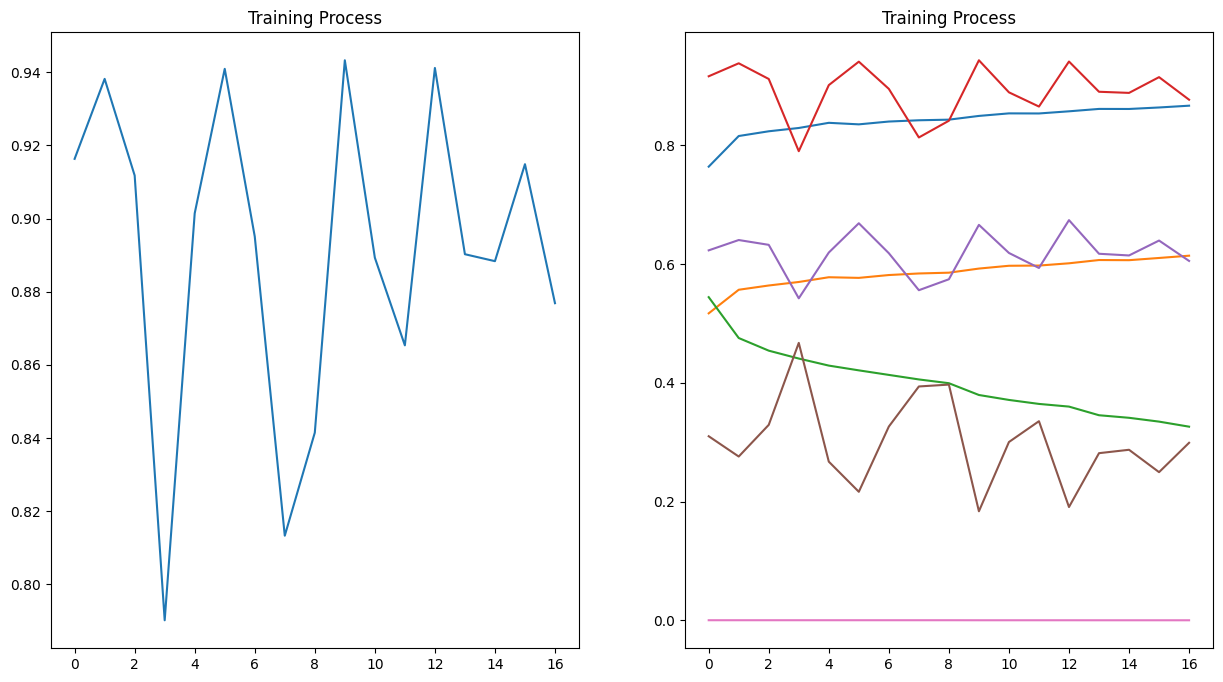

<Figure size 640x480 with 0 Axes>

922/922 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step
Accuracy: 0.9432989690721649
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     28319
           1       0.35      0.51      0.42      1169

    accuracy                           0.94     29488
   macro avg       0.67      0.74      0.69     29488
weighted avg       0.95      0.94      0.95     29488

Confusion Matrix:
[[27220  1099]
 [  573   596]]


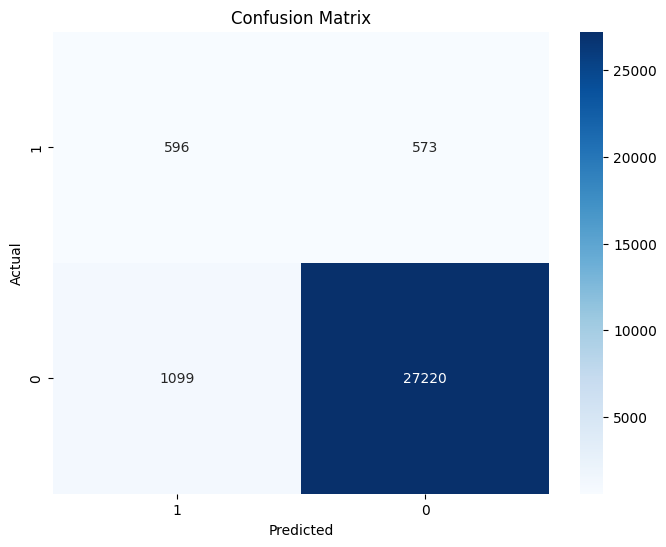

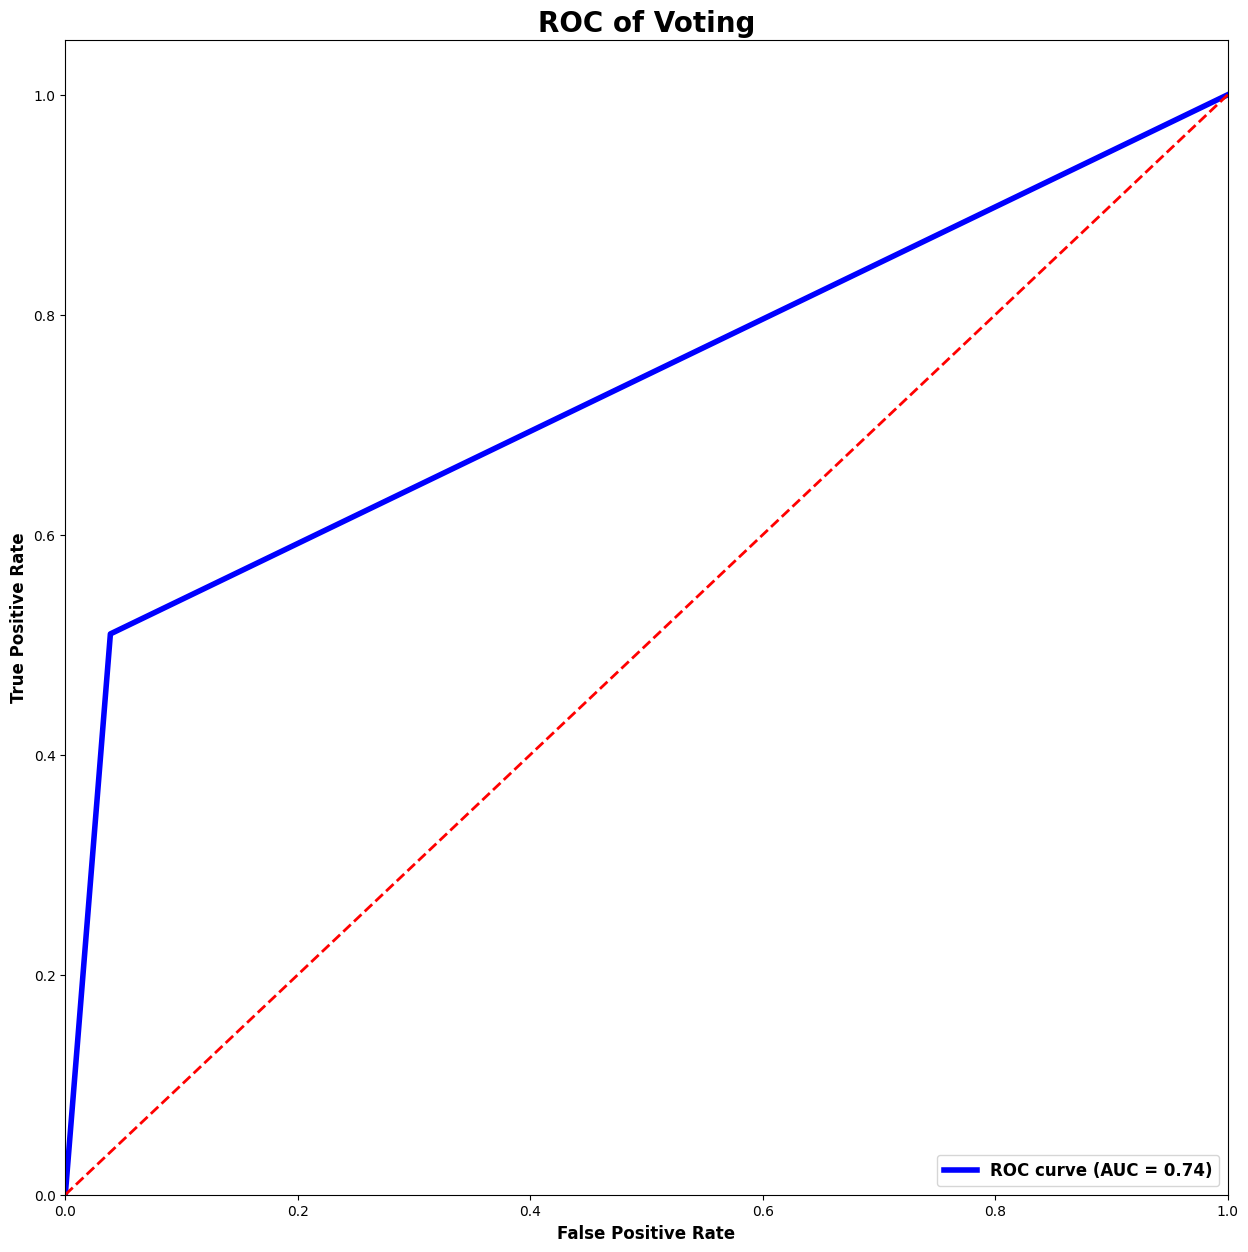

In [8]:
%run /kaggle/working/ads_fraud_detection/src/prj3/5.deep_learning_model/1.base/InceptionV2/inceptionv2_class_weight_kaggle.ipynb

/kaggle/working/ads_fraud_detection
Using GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
(29488, 2) (561003, 2)
(29488, 2)
89


Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 89, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_203 (Conv1D)       │ (None, 44, 32)         │             96 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_203   │ (None, 44, 32)         │            132 │ conv1d_203[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_203            │ (None, 44, 32)         │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_204 (Conv1D)       │ (None, 42, 32)         │          3,072 │ activation_203[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_204   │ (None, 42, 32)         │            126 │ conv1d_204[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_204            │ (None, 42, 32)         │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_205 (Conv1D)       │ (None, 40, 64)         │          6,144 │ activation_204[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_205   │ (None, 40, 64)         │            120 │ conv1d_205[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_205            │ (None, 40, 64)         │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_pool               │ (None, 19, 64)         │              0 │ activation_205[0][0]   │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_209 (Conv1D)       │ (None, 19, 64)         │          4,096 │ block1_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_209   │ (None, 19, 64)         │             57 │ conv1d_209[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_209            │ (None, 19, 64)         │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_207 (Conv1D)  

 Total params: 1,974,551 (7.53 MB)

 Trainable params: 1,973,065 (7.53 MB)

 Non-trainable params: 1,486 (5.80 KB)

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 89, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_203 (Conv1D)       │ (None, 44, 32)         │             96 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_203   │ (None, 44, 32)         │            132 │ conv1d_203[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_203            │ (None, 44, 32)         │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_204 (Conv1D)       │ (None, 42, 32)         │          3,072 │ activation_203[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_204   │ (None, 42, 32)         │            126 │ conv1d_204[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_204            │ (None, 42, 32)         │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_205 (Conv1D)       │ (None, 40, 64)         │          6,144 │ activation_204[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_205   │ (None, 40, 64)         │            120 │ conv1d_205[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_205            │ (None, 40, 64)         │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_pool               │ (None, 19, 64)         │              0 │ activation_205[0][0]   │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_209 (Conv1D)       │ (None, 19, 64)         │          4,096 │ block1_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_209   │ (None, 19, 64)         │             57 │ conv1d_209[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_209            │ (None, 19, 64)         │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_207 (Conv1D)  

 Total params: 1,974,551 (7.53 MB)

 Trainable params: 1,973,065 (7.53 MB)

 Non-trainable params: 1,486 (5.80 KB)

Epoch 1/1200
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 111s 37ms/step - accuracy: 0.7309 - f1_score: 0.4916 - loss: 0.5768 - val_accuracy: 0.4884 - val_f1_score: 0.3765 - val_loss: 0.9866 - learning_rate: 1.0000e-04
Epoch 2/1200
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 60s 27ms/step - accuracy: 0.8226 - f1_score: 0.5625 - loss: 0.4635 - val_accuracy: 0.9479 - val_f1_score: 0.6683 - val_loss: 0.2113 - learning_rate: 1.0000e-04
Epoch 3/1200
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 60s 27ms/step - accuracy: 0.8352 - f1_score: 0.5734 - loss: 0.4394 - val_accuracy: 0.8852 - val_f1_score: 0.6136 - val_loss: 0.3480 - learning_rate: 1.0000e-04
Epoch 4/1200
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 60s 27ms/step - accuracy: 0.8404 - f1_score: 0.5814 - loss: 0.4288 - val_accuracy: 0.9132 - val_f1_score: 0.6389 - val_loss: 0.3032 - learning_rate: 1.0000e-04
Epoch 5/1200
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 60s 28ms/step - accuracy: 0.8399 - f1_score: 0.5826 - loss: 0.4220 - val_accuracy: 0.9562 - val_f1_score: 0.6812 - val_loss: 0.1891 - learn

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 89, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_203 (Conv1D)       │ (None, 44, 32)         │             96 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_203   │ (None, 44, 32)         │            132 │ conv1d_203[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_203            │ (None, 44, 32)         │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_204 (Conv1D)       │ (None, 42, 32)         │          3,072 │ activation_203[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_204   │ (None, 42, 32)         │            126 │ conv1d_204[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_204            │ (None, 42, 32)         │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_205 (Conv1D)       │ (None, 40, 64)         │          6,144 │ activation_204[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_205   │ (None, 40, 64)         │            120 │ conv1d_205[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_205            │ (None, 40, 64)         │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_pool               │ (None, 19, 64)         │              0 │ activation_205[0][0]   │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_209 (Conv1D)       │ (None, 19, 64)         │          4,096 │ block1_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_209   │ (None, 19, 64)         │             57 │ conv1d_209[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_209            │ (None, 19, 64)         │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_207 (Conv1D)  

 Total params: 5,920,683 (22.59 MB)

 Trainable params: 1,973,065 (7.53 MB)

 Non-trainable params: 1,486 (5.80 KB)

 Optimizer params: 3,946,132 (15.05 MB)

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 89, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_203 (Conv1D)       │ (None, 44, 32)         │             96 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_203   │ (None, 44, 32)         │            132 │ conv1d_203[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_203            │ (None, 44, 32)         │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_204 (Conv1D)       │ (None, 42, 32)         │          3,072 │ activation_203[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_204   │ (None, 42, 32)         │            126 │ conv1d_204[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_204            │ (None, 42, 32)         │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_205 (Conv1D)       │ (None, 40, 64)         │          6,144 │ activation_204[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_205   │ (None, 40, 64)         │            120 │ conv1d_205[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_205            │ (None, 40, 64)         │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_pool               │ (None, 19, 64)         │              0 │ activation_205[0][0]   │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_209 (Conv1D)       │ (None, 19, 64)         │          4,096 │ block1_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_209   │ (None, 19, 64)         │             57 │ conv1d_209[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_209            │ (None, 19, 64)         │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_207 (Conv1D)  

 Total params: 5,920,683 (22.59 MB)

 Trainable params: 1,973,065 (7.53 MB)

 Non-trainable params: 1,486 (5.80 KB)

 Optimizer params: 3,946,132 (15.05 MB)

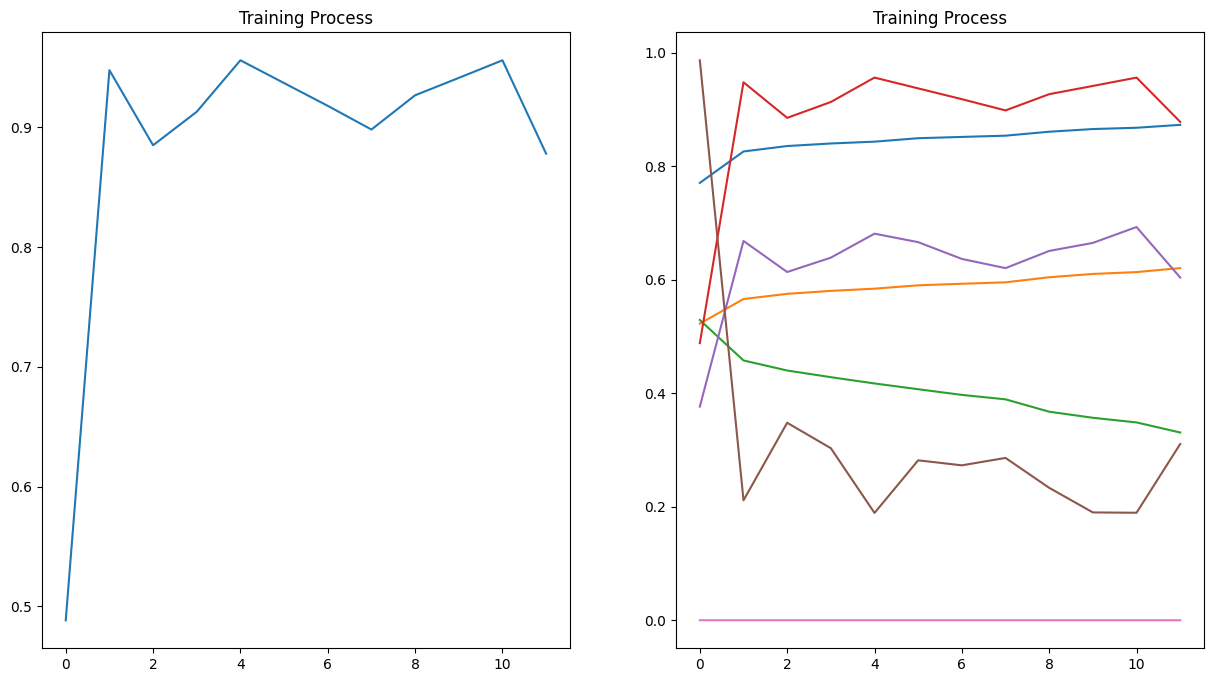

<Figure size 640x480 with 0 Axes>

922/922 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step
Accuracy: 0.956151654910472
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     28319
           1       0.45      0.44      0.45      1169

    accuracy                           0.96     29488
   macro avg       0.71      0.71      0.71     29488
weighted avg       0.96      0.96      0.96     29488

Confusion Matrix:
[[27675   644]
 [  649   520]]


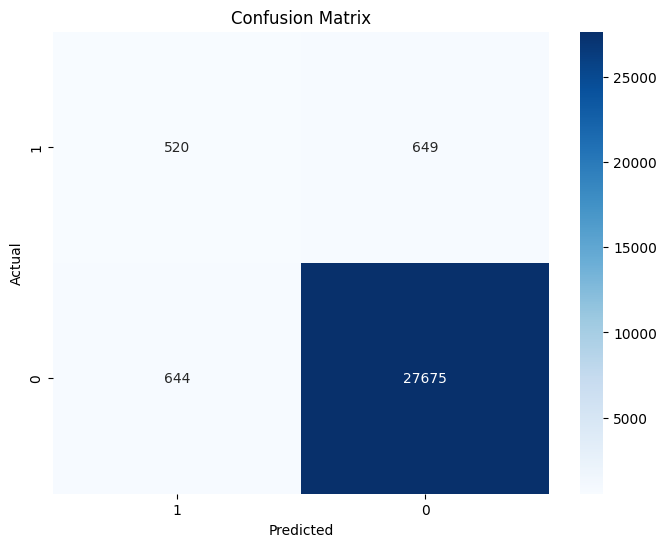

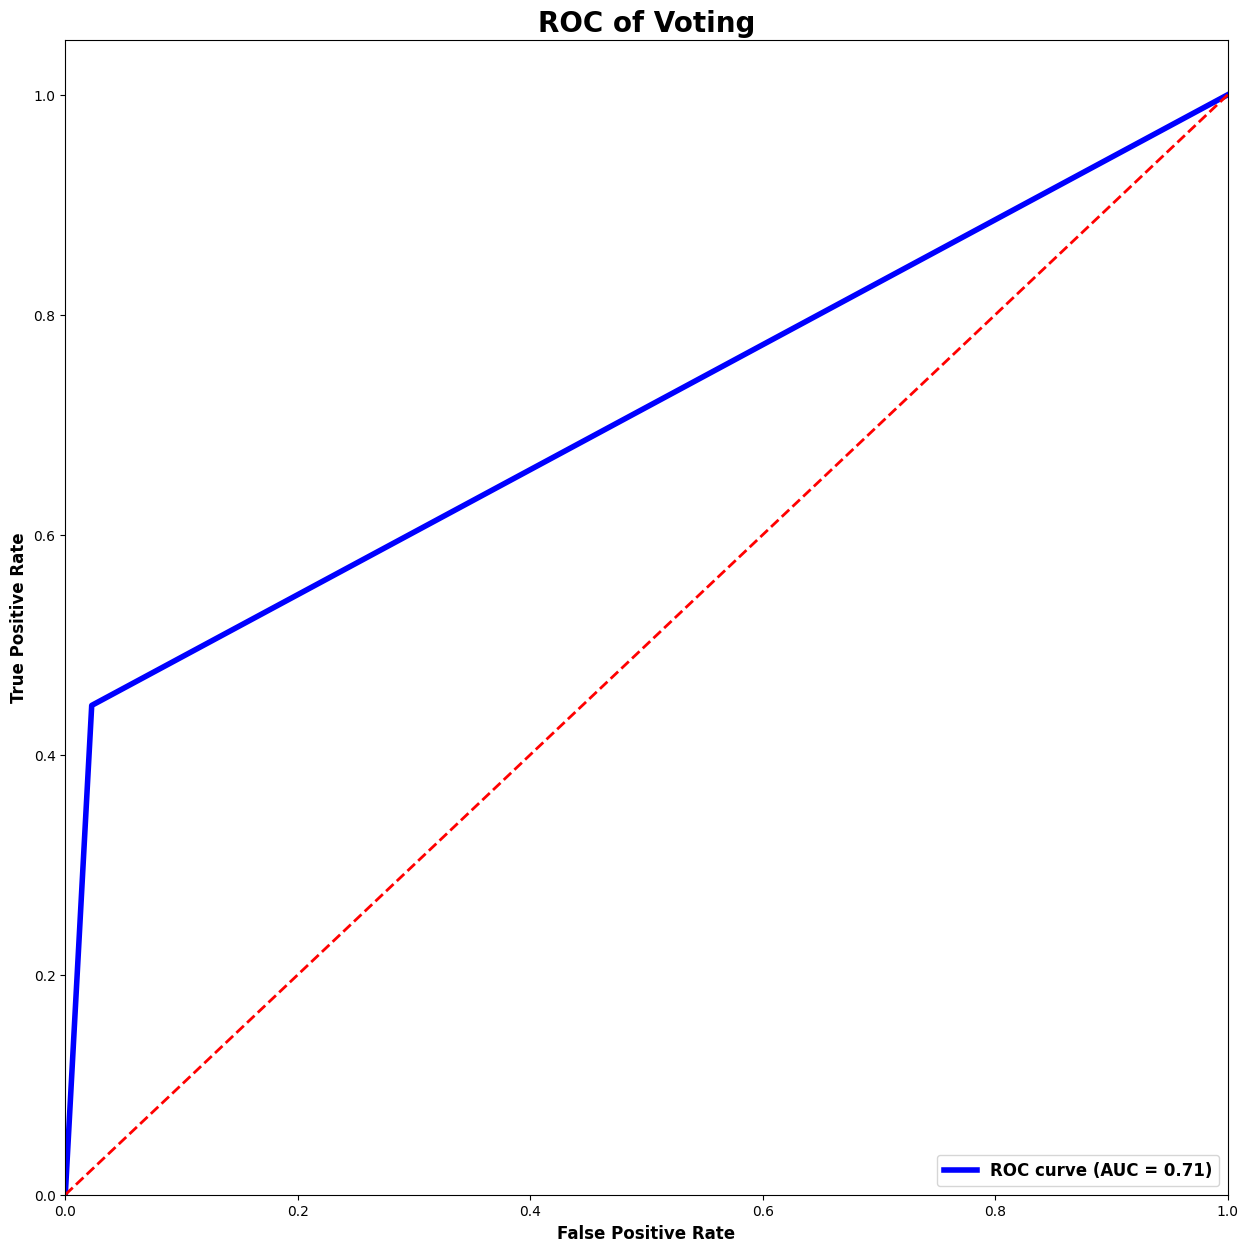

In [9]:
%run /kaggle/working/ads_fraud_detection/src/prj3/5.deep_learning_model/1.base/InceptionV3/inceptionv3_class_weight_kaggle.ipynb

/kaggle/working/ads_fraud_detection
Using GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
(29488, 2) (561003, 2)
(29488, 2)
89


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 89, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv1D)                │ (None, 89, 128)             │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv1D)                │ (None, 89, 128)             │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling1D)           │ (None, 44, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv1D)                │ (None, 44, 256)             │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv1D)                │ (None, 44, 256)             │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling1D)           │ (None, 22, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv1D)                │ (None, 22, 512)             │         393,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv1D)                │ (None, 22, 512)             │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv1D)                │ (None, 22, 512)             │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling1D)           │ (None, 11, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv1D)                │ (None, 11, 1024)            │       1,573,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv1D)                │ (None, 11, 1024)            │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv1D)                │ (None, 11, 1024)            │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling1D)           │ (None, 5, 1024)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling1D)           │ (None, 2, 1024)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ predictions (Dense)                  │ (None, 2)                   │           2,0

 Total params: 19,622,530 (74.85 MB)

 Trainable params: 19,622,530 (74.85 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1200
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 154s 63ms/step - accuracy: 0.5025 - f1_score: 0.3277 - loss: 3.3270 - val_accuracy: 0.5853 - val_f1_score: 0.3946 - val_loss: 0.6204 - learning_rate: 1.0000e-04
Epoch 2/1200
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 129s 59ms/step - accuracy: 0.5568 - f1_score: 0.3748 - loss: 0.6915 - val_accuracy: 0.5893 - val_f1_score: 0.4203 - val_loss: 0.7945 - learning_rate: 1.0000e-04
Epoch 3/1200
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 129s 59ms/step - accuracy: 0.7845 - f1_score: 0.5268 - loss: 0.5632 - val_accuracy: 0.7978 - val_f1_score: 0.5449 - val_loss: 0.5259 - learning_rate: 1.0000e-04
Epoch 4/1200
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 129s 59ms/step - accuracy: 0.8237 - f1_score: 0.5583 - loss: 0.4937 - val_accuracy: 0.9159 - val_f1_score: 0.6388 - val_loss: 0.2590 - learning_rate: 1.0000e-04
Epoch 5/1200
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 129s 59ms/step - accuracy: 0.8268 - f1_score: 0.5652 - loss: 0.4769 - val_accuracy: 0.6667 - val_f1_score: 0.4748 - val_loss: 0.6371 - l

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 89, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv1D)                │ (None, 89, 128)             │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv1D)                │ (None, 89, 128)             │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling1D)           │ (None, 44, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv1D)                │ (None, 44, 256)             │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv1D)                │ (None, 44, 256)             │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling1D)           │ (None, 22, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv1D)                │ (None, 22, 512)             │         393,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv1D)                │ (None, 22, 512)             │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv1D)                │ (None, 22, 512)             │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling1D)           │ (None, 11, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv1D)                │ (None, 11, 1024)            │       1,573,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv1D)                │ (None, 11, 1024)            │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv1D)                │ (None, 11, 1024)            │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling1D)           │ (None, 5, 1024)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling1D)           │ (None, 2, 1024)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ predictions (Dense)                  │ (None, 2)                   │           2,0

 Total params: 58,867,592 (224.56 MB)

 Trainable params: 19,622,530 (74.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 39,245,062 (149.71 MB)

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 89, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv1D)                │ (None, 89, 128)             │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv1D)                │ (None, 89, 128)             │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling1D)           │ (None, 44, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv1D)                │ (None, 44, 256)             │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv1D)                │ (None, 44, 256)             │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling1D)           │ (None, 22, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv1D)                │ (None, 22, 512)             │         393,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv1D)                │ (None, 22, 512)             │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv1D)                │ (None, 22, 512)             │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling1D)           │ (None, 11, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv1D)                │ (None, 11, 1024)            │       1,573,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv1D)                │ (None, 11, 1024)            │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv1D)                │ (None, 11, 1024)            │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling1D)           │ (None, 5, 1024)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling1D)           │ (None, 2, 1024)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ predictions (Dense)                  │ (None, 2)                   │           2,0

 Total params: 58,867,592 (224.56 MB)

 Trainable params: 19,622,530 (74.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 39,245,062 (149.71 MB)

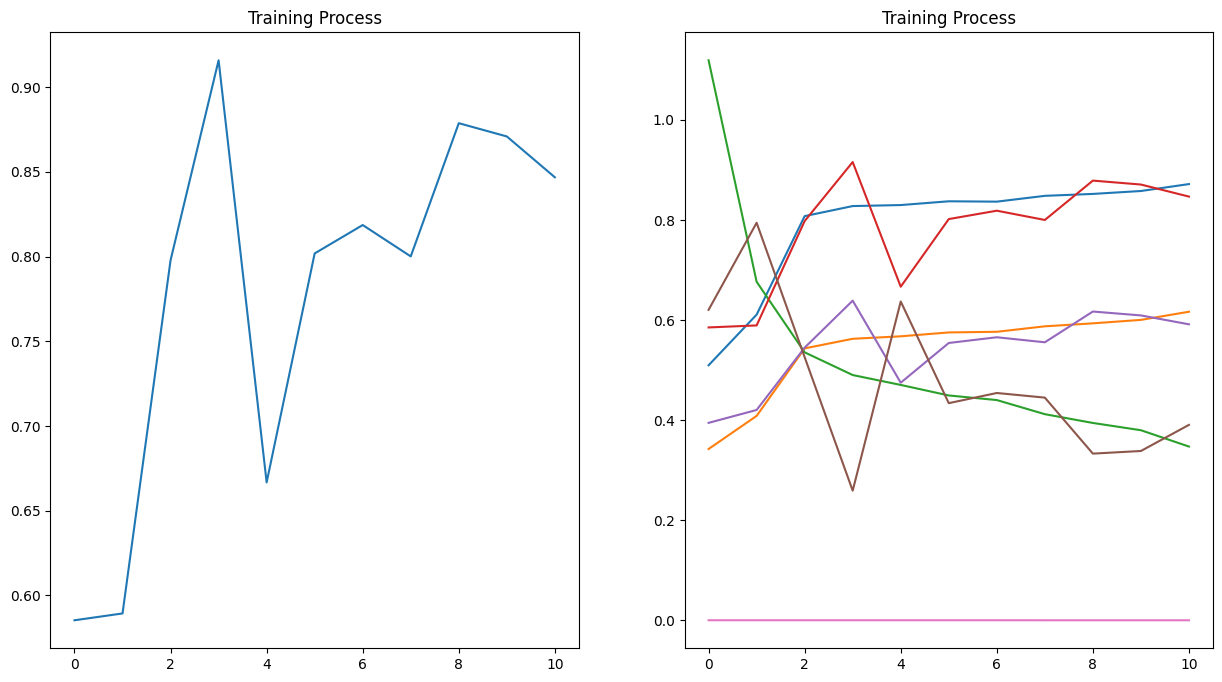

<Figure size 640x480 with 0 Axes>

922/922 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step
Accuracy: 0.9158640803038525
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95     28319
           1       0.26      0.60      0.36      1169

    accuracy                           0.92     29488
   macro avg       0.62      0.77      0.66     29488
weighted avg       0.95      0.92      0.93     29488

Confusion Matrix:
[[26300  2019]
 [  462   707]]


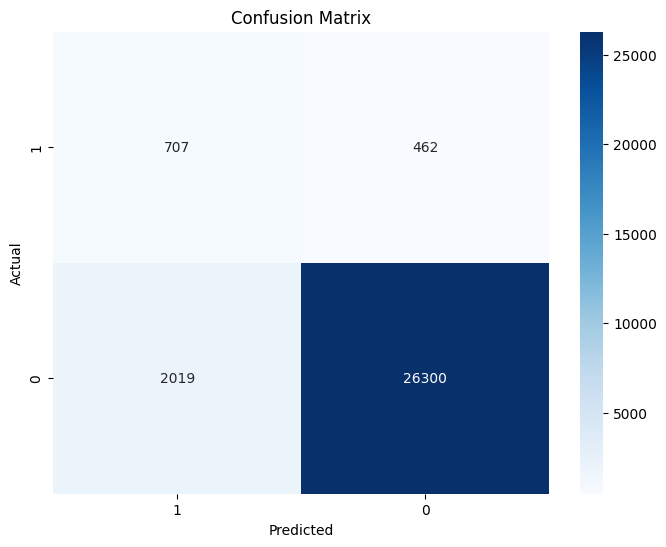

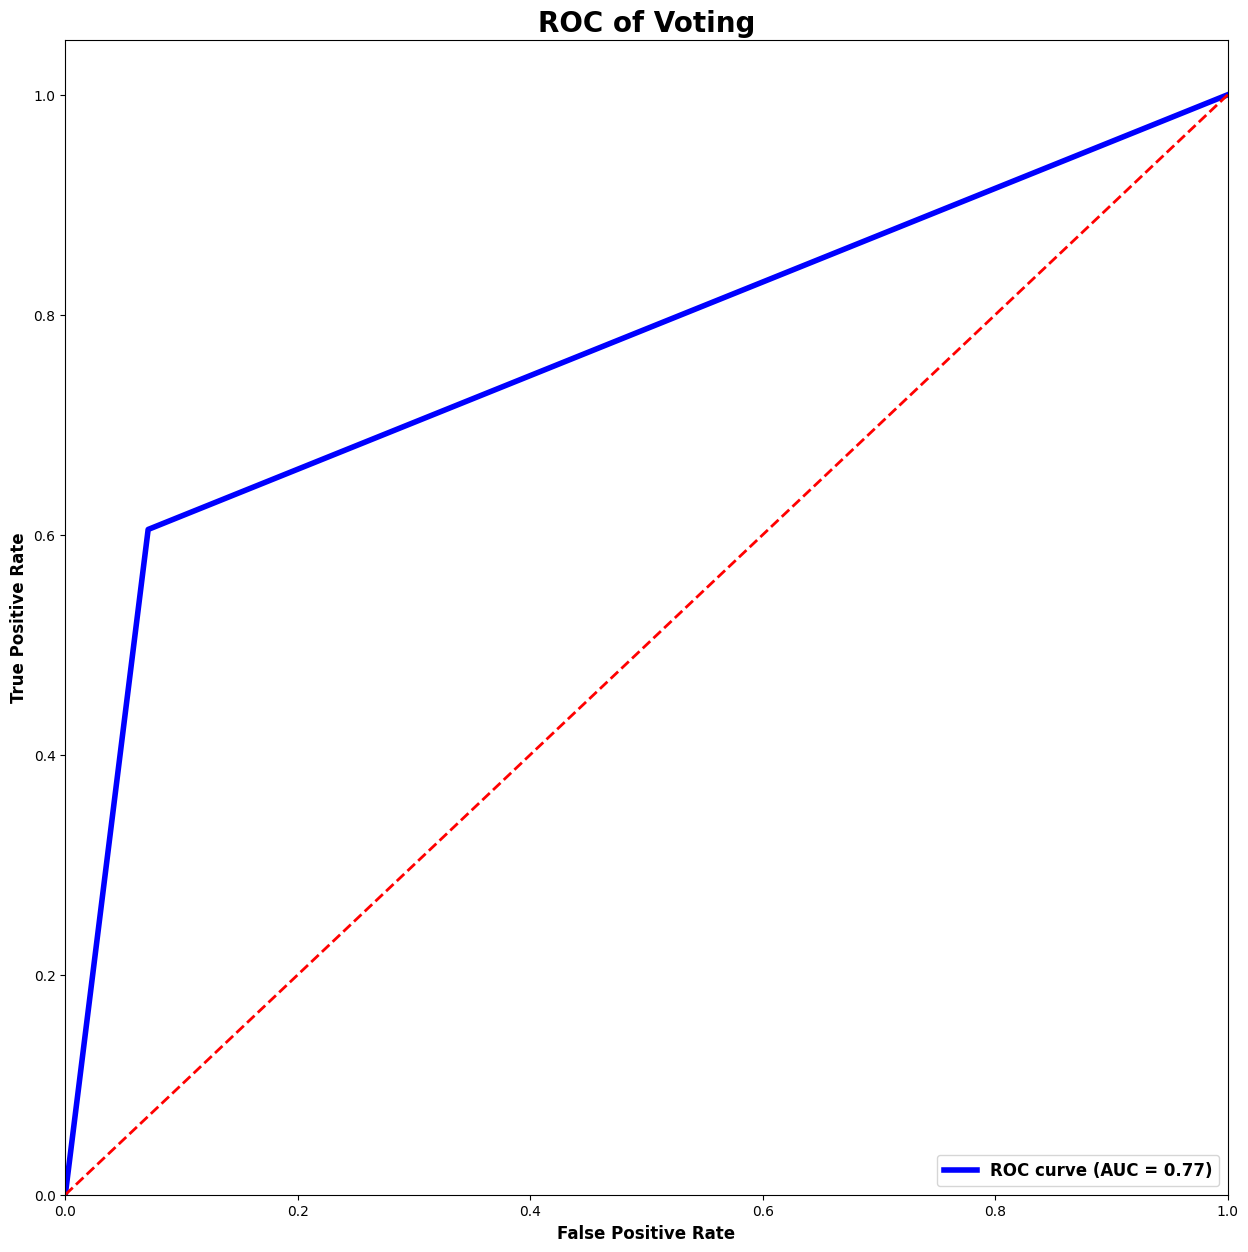

In [10]:
%run /kaggle/working/ads_fraud_detection/src/prj3/5.deep_learning_model/1.base/VGG16/vgg16_class_weight_kaggle.ipynb

/kaggle/working/ads_fraud_detection
Using GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
(29488, 2) (561003, 2)
(29488, 2)
89


Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 89, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv1D)                │ (None, 89, 256)             │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv1D)                │ (None, 89, 256)             │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling1D)           │ (None, 44, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv1D)                │ (None, 44, 512)             │         393,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv1D)                │ (None, 44, 512)             │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling1D)           │ (None, 22, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv1D)                │ (None, 22, 768)             │       1,180,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv1D)                │ (None, 22, 768)             │       1,770,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv1D)                │ (None, 22, 768)             │       1,770,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv1D)                │ (None, 22, 768)             │       1,770,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling1D)           │ (None, 11, 768)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv1D)                │ (None, 11, 1024)            │       2,360,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv1D)                │ (None, 11, 1024)            │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv1D)                │ (None, 11, 1024)            │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv1D)                │ (None, 11, 1024)            │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling1D)           │ (None, 5, 1024)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 32,259,330 (123.06 MB)

 Trainable params: 32,259,330 (123.06 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1200
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 269s 115ms/step - accuracy: 0.4791 - f1_score: 0.3027 - loss: 1.3040 - val_accuracy: 0.5719 - val_f1_score: 0.3982 - val_loss: 0.7276 - learning_rate: 1.0000e-04
Epoch 2/1200
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 239s 109ms/step - accuracy: 0.6369 - f1_score: 0.4103 - loss: 0.6891 - val_accuracy: 0.6897 - val_f1_score: 0.4393 - val_loss: 0.6688 - learning_rate: 1.0000e-04
Epoch 3/1200
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 239s 109ms/step - accuracy: 0.7466 - f1_score: 0.4919 - loss: 0.6216 - val_accuracy: 0.7815 - val_f1_score: 0.5396 - val_loss: 0.5159 - learning_rate: 1.0000e-04
Epoch 4/1200
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 239s 109ms/step - accuracy: 0.8275 - f1_score: 0.5658 - loss: 0.4785 - val_accuracy: 0.7594 - val_f1_score: 0.5284 - val_loss: 0.5054 - learning_rate: 1.0000e-04
Epoch 5/1200
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 239s 109ms/step - accuracy: 0.8357 - f1_score: 0.5735 - loss: 0.4516 - val_accuracy: 0.8221 - val_f1_score: 0.5672 - val_loss: 0.459

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 89, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv1D)                │ (None, 89, 256)             │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv1D)                │ (None, 89, 256)             │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling1D)           │ (None, 44, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv1D)                │ (None, 44, 512)             │         393,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv1D)                │ (None, 44, 512)             │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling1D)           │ (None, 22, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv1D)                │ (None, 22, 768)             │       1,180,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv1D)                │ (None, 22, 768)             │       1,770,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv1D)                │ (None, 22, 768)             │       1,770,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv1D)                │ (None, 22, 768)             │       1,770,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling1D)           │ (None, 11, 768)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv1D)                │ (None, 11, 1024)            │       2,360,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv1D)                │ (None, 11, 1024)            │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv1D)                │ (None, 11, 1024)            │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv1D)                │ (None, 11, 1024)            │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling1D)           │ (None, 5, 1024)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 96,777,992 (369.18 MB)

 Trainable params: 32,259,330 (123.06 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64,518,662 (246.12 MB)

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 89, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv1D)                │ (None, 89, 256)             │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv1D)                │ (None, 89, 256)             │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling1D)           │ (None, 44, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv1D)                │ (None, 44, 512)             │         393,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv1D)                │ (None, 44, 512)             │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling1D)           │ (None, 22, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv1D)                │ (None, 22, 768)             │       1,180,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv1D)                │ (None, 22, 768)             │       1,770,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv1D)                │ (None, 22, 768)             │       1,770,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv1D)                │ (None, 22, 768)             │       1,770,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling1D)           │ (None, 11, 768)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv1D)                │ (None, 11, 1024)            │       2,360,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv1D)                │ (None, 11, 1024)            │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv1D)                │ (None, 11, 1024)            │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv1D)                │ (None, 11, 1024)            │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling1D)           │ (None, 5, 1024)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 96,777,992 (369.18 MB)

 Trainable params: 32,259,330 (123.06 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64,518,662 (246.12 MB)

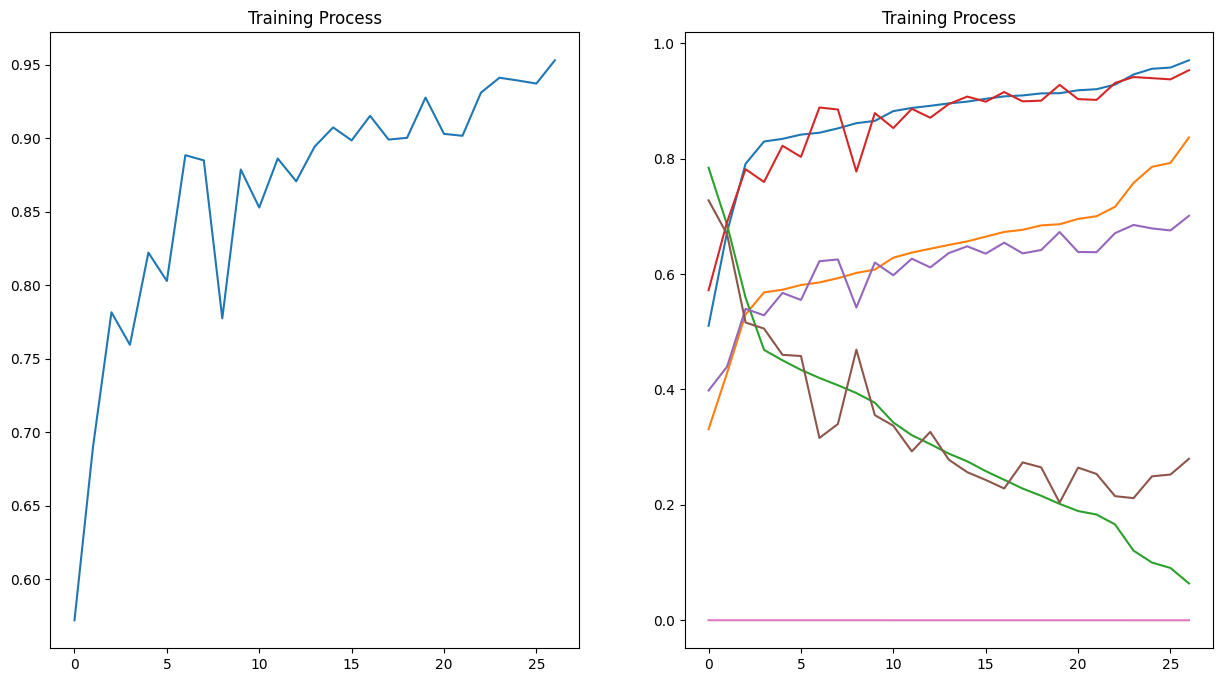

<Figure size 640x480 with 0 Axes>

922/922 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step
Accuracy: 0.9275298426478568
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96     28319
           1       0.31      0.68      0.43      1169

    accuracy                           0.93     29488
   macro avg       0.65      0.81      0.69     29488
weighted avg       0.96      0.93      0.94     29488

Confusion Matrix:
[[26561  1758]
 [  379   790]]


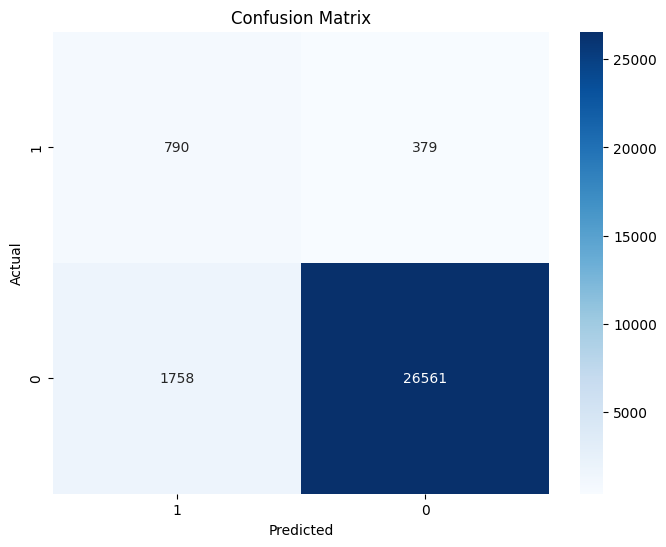

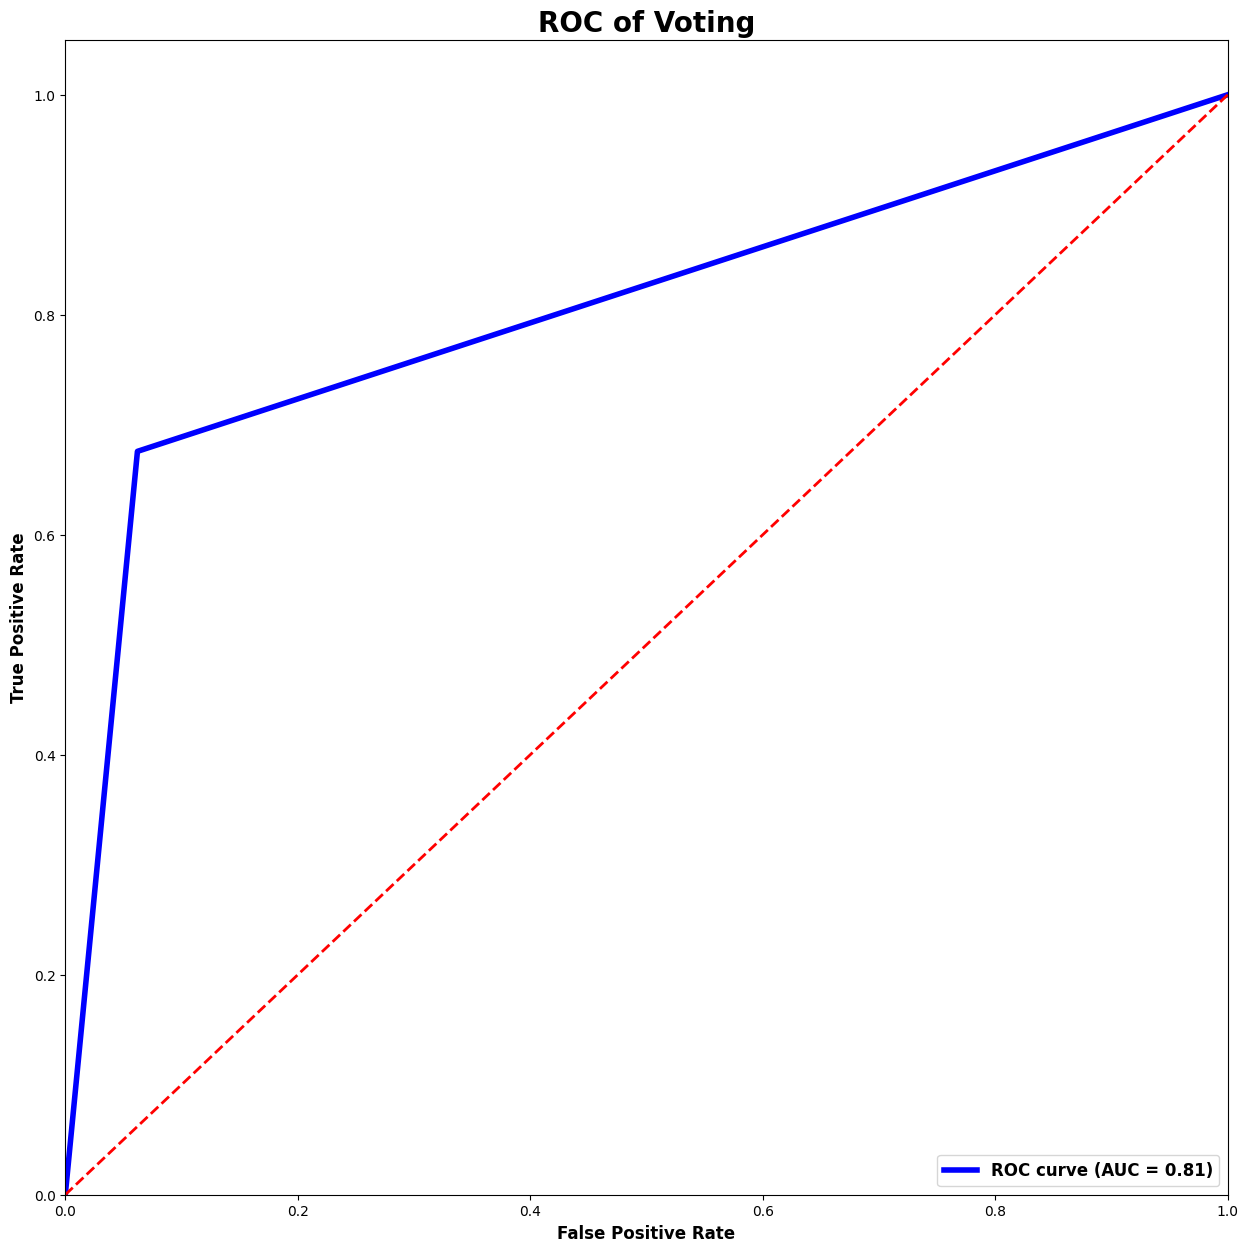

In [11]:
%run /kaggle/working/ads_fraud_detection/src/prj3/5.deep_learning_model/1.base/VGG19/vgg19_class_weight_kaggle.ipynb

/kaggle/working/ads_fraud_detection
Using GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
(29488, 2) (561003, 2)
(29488, 2)
89


Model: "resnet50_1d"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 89, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding1d            │ (None, 91, 1)          │              0 │ input_layer_5[0][0]    │
│ (ZeroPadding1D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1 (Conv1D)            │ (None, 46, 64)         │            512 │ zero_padding1d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_conv1                  │ (None, 46, 64)         │            256 │ conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_249            │ (None, 46, 64)         │              0 │ bn_conv1[0][0]         │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_5           │ (None, 22, 64)         │              0 │ activation_249[0][0]   │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ res2a_branch2a (Conv1D)   │ (None, 22, 32)         │          2,080 │ max_pooling1d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn2a_branch2a             │ (None, 22, 32)         │             88 │ res2a_branch2a[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_250            │ (None, 22, 32)         │              0 │ bn2a_branch2a[0][0]    │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ res2a_branch2b (Conv1D)   │ (None, 22, 32)         │          3,104 │ activation_250[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn2a_branch2b             │ (None, 22, 32)         │             88 │ res2a_branch2b[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_251            │ (None, 22, 32)         │              0 │ bn2a_branch2b[0][0]    │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ res2a_branch2c (Conv1D)   │ (None, 22, 96)         │          3,168 │ activation_251[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ res2a_branch1 (Conv1D)    │ (None, 22, 96)         │          6,240 │ max_pooling1d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn2a_branch2c             │ (None, 22, 96)         │             88 │ res2a_branch2c[0][0]   │
│ (BatchNormalization) 

 Total params: 947,130 (3.61 MB)

 Trainable params: 946,270 (3.61 MB)

 Non-trainable params: 860 (3.36 KB)

Epoch 1/1200
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 76s 22ms/step - accuracy: 0.5782 - f1_score: 0.3771 - loss: 0.7301 - val_accuracy: 0.9517 - val_f1_score: 0.5069 - val_loss: 0.3749 - learning_rate: 0.0010
Epoch 2/1200
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 34s 15ms/step - accuracy: 0.7504 - f1_score: 0.4998 - loss: 0.5949 - val_accuracy: 0.0396 - val_f1_score: 0.0375 - val_loss: 9.9309 - learning_rate: 0.0010
Epoch 3/1200
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 34s 16ms/step - accuracy: 0.8253 - f1_score: 0.5580 - loss: 0.5151 - val_accuracy: 0.0396 - val_f1_score: 0.0375 - val_loss: 2.2852 - learning_rate: 0.0010
Epoch 4/1200
2191/2192 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8243 - f1_score: 0.5574 - loss: 0.5023
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 34s 16ms/step - accuracy: 0.8243 - f1_score: 0.5574 - loss: 0.5023 - val_accuracy: 0.0763 - val_f1_score: 0.0751 - val_loss: 4.4889 - learning_rate: 0.0010
Epoch 5/1200
2192/2192 ━━━━

Model: "resnet50_1d"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 89, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding1d            │ (None, 91, 1)          │              0 │ input_layer_5[0][0]    │
│ (ZeroPadding1D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1 (Conv1D)            │ (None, 46, 64)         │            512 │ zero_padding1d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_conv1                  │ (None, 46, 64)         │            256 │ conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_249            │ (None, 46, 64)         │              0 │ bn_conv1[0][0]         │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_5           │ (None, 22, 64)         │              0 │ activation_249[0][0]   │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ res2a_branch2a (Conv1D)   │ (None, 22, 32)         │          2,080 │ max_pooling1d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn2a_branch2a             │ (None, 22, 32)         │             88 │ res2a_branch2a[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_250            │ (None, 22, 32)         │              0 │ bn2a_branch2a[0][0]    │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ res2a_branch2b (Conv1D)   │ (None, 22, 32)         │          3,104 │ activation_250[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn2a_branch2b             │ (None, 22, 32)         │             88 │ res2a_branch2b[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_251            │ (None, 22, 32)         │              0 │ bn2a_branch2b[0][0]    │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ res2a_branch2c (Conv1D)   │ (None, 22, 96)         │          3,168 │ activation_251[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ res2a_branch1 (Conv1D)    │ (None, 22, 96)         │          6,240 │ max_pooling1d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn2a_branch2c             │ (None, 22, 96)         │             88 │ res2a_branch2c[0][0]   │
│ (BatchNormalization) 

 Total params: 2,839,672 (10.83 MB)

 Trainable params: 946,270 (3.61 MB)

 Non-trainable params: 860 (3.36 KB)

 Optimizer params: 1,892,542 (7.22 MB)

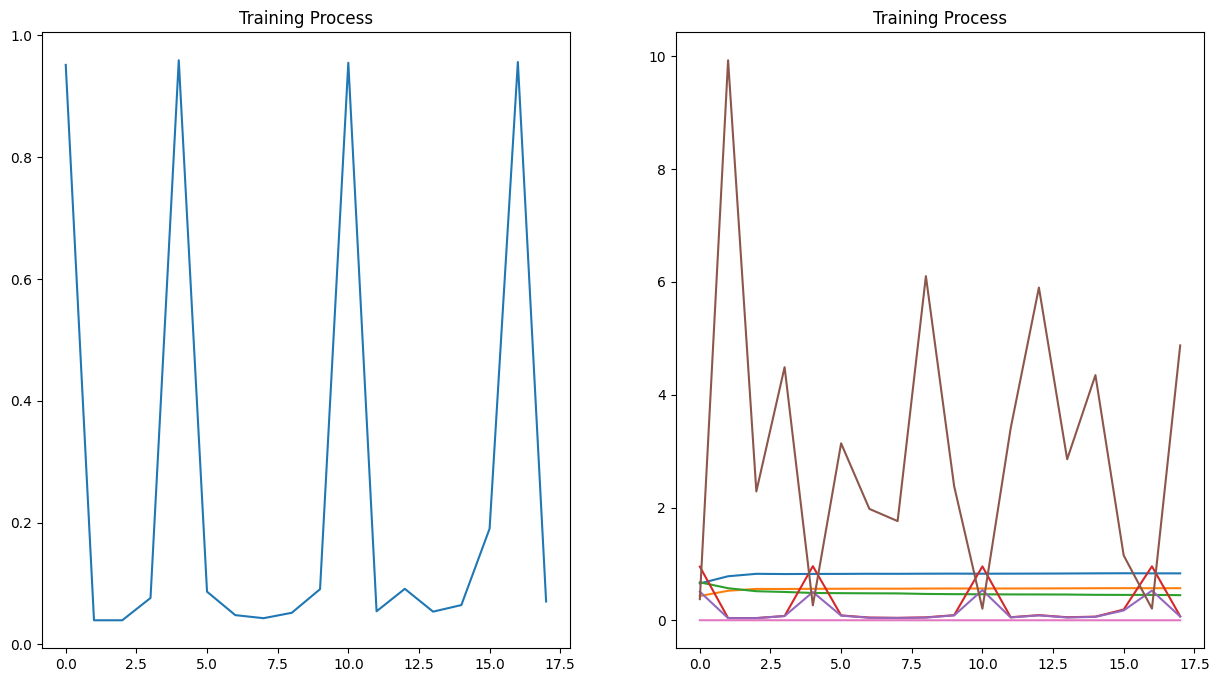

<Figure size 640x480 with 0 Axes>

922/922 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step
Accuracy: 0.9552699403147042
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28319
           1       0.26      0.07      0.11      1169

    accuracy                           0.96     29488
   macro avg       0.61      0.53      0.54     29488
weighted avg       0.93      0.96      0.94     29488

Confusion Matrix:
[[28090   229]
 [ 1090    79]]


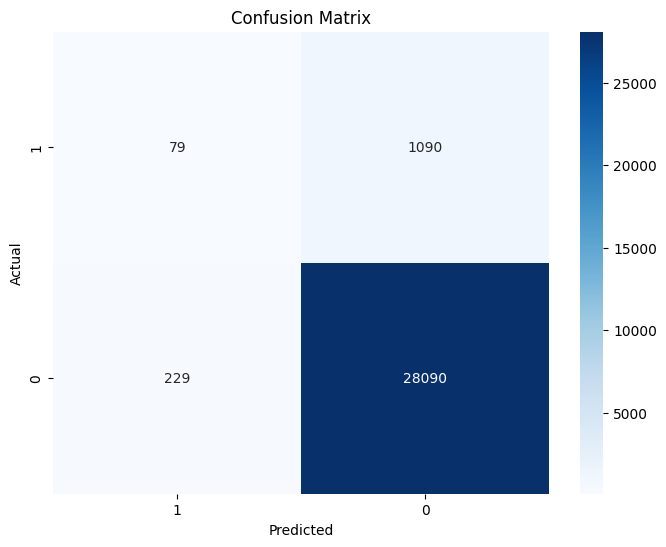

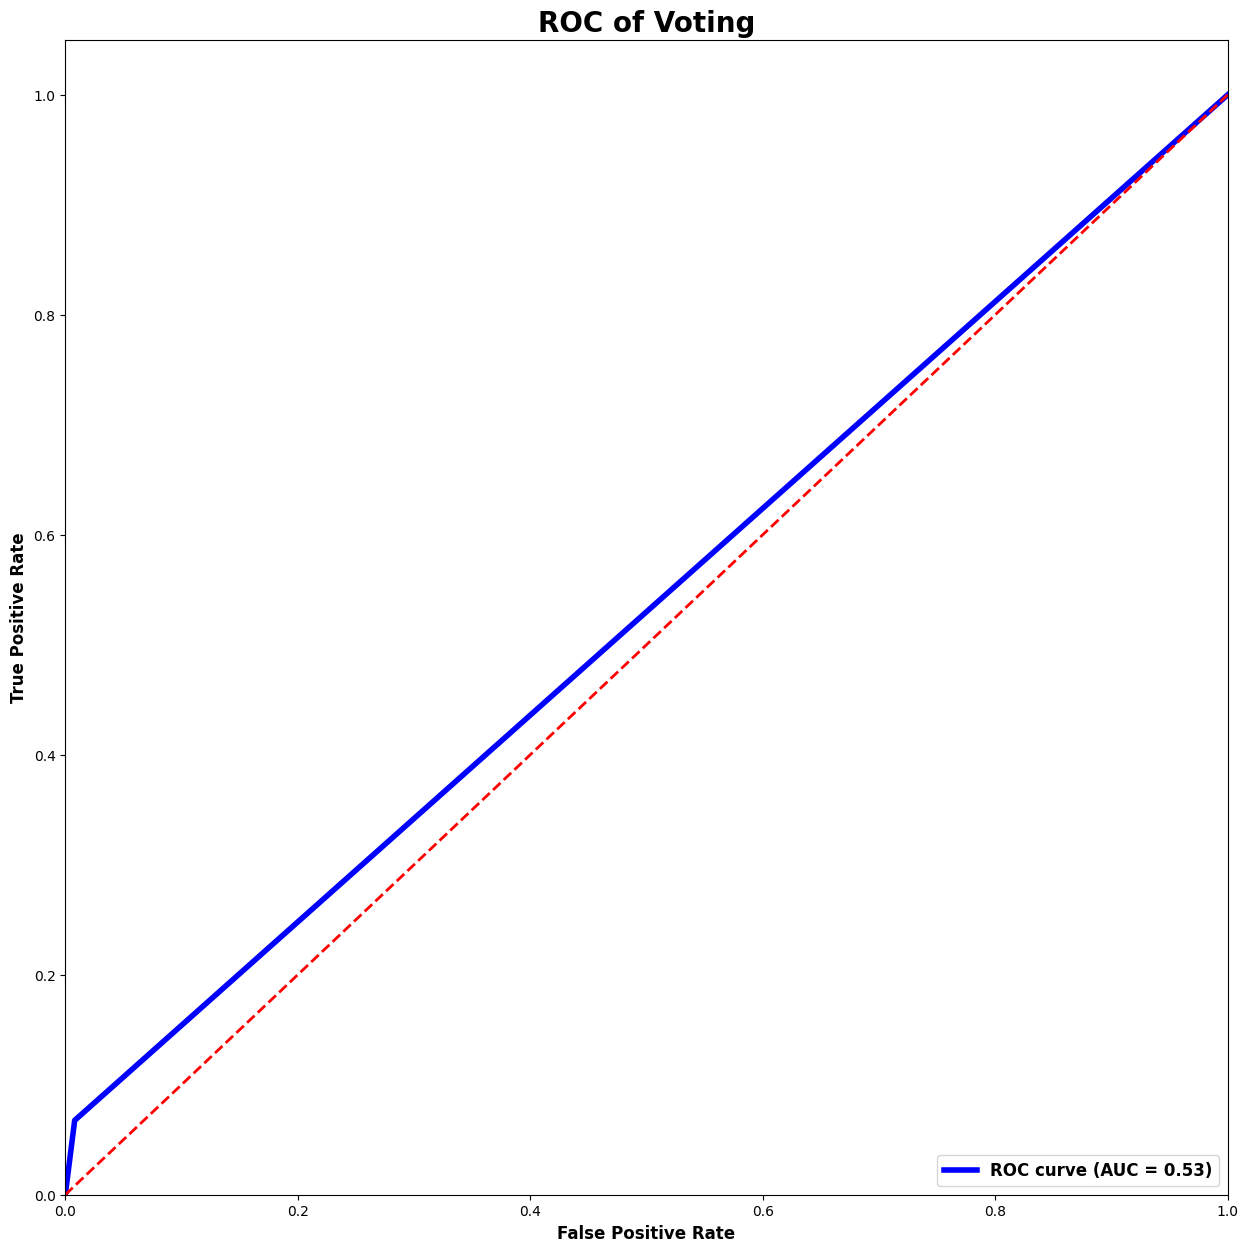

In [12]:
%run /kaggle/working/ads_fraud_detection/src/prj3/5.deep_learning_model/1.base/Resnet50/resnet50__classweight_kaggle.ipynb